# Who will survive in Titanic?

When the Titanic sank, 1502 of the 2224 passengers and crew were killed. One of the main reasons for this high level of casualties was the lack of lifeboats on this self-proclaimed "unsinkable" ship.

Those that have seen the movie know that some individuals were more likely to survive the sinking (lucky Rose) than others (poor Jack). Since we got the data about the passengers, it's a good idea to apply machine learning techniques to predict a passenger's chance of surviving using Python.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/xuemingli/anaconda/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [5]:
# Load the train and test datasets to create two DataFrames
#train_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/train.csv"
train = pd.read_csv("train.csv")

#test_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/test.csv"
test = pd.read_csv("test.csv")


.describe() summarizes the columns/features of the DataFrame, including the count of observations, mean, max and so on. Another useful trick is to look at the dimensions of the DataFrame. This is done by requesting the .shape attribute of your DataFrame object. (ex. your_data.shape)

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [8]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


For the qualtiles of "Age" variable, there are "NaN"s, which means there are probably lots of Age information missing. 

In [4]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [5]:
print "train shape:", train.shape
print "test shape:",  test.shape
print "Age counts:", train["Age"].count()

train shape: (891, 12)
test shape: (418, 11)
Age counts: 714


(array([ 549.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  342.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

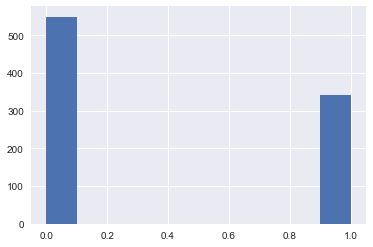

In [40]:
# Plot death and survival counts
plt.hist(train['Survived'])

In [42]:
pclass_xt = pd.crosstab(train['Pclass'], train['Survived'])
pclass_xt

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


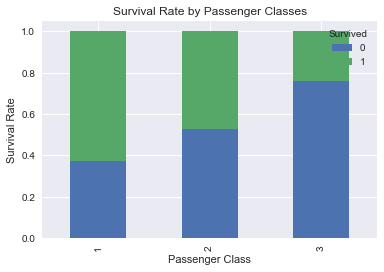

In [43]:
pclass_xt_pct = pclass_xt.div(pclass_xt.sum(1).astype(float),axis= 0)
pclass_xt_pct.plot(kind='bar', 
                   stacked=True, 
                   title='Survival Rate by Passenger Classes')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')

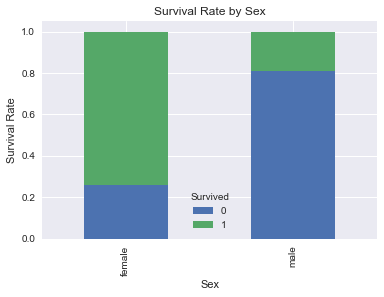

In [44]:
sex_xt = pd.crosstab(train['Sex'], train['Survived'])
sex_xt_pct = sex_xt.div(sex_xt.sum(1).astype(float),axis= 0)
sex_xt_pct.plot(kind='bar', 
                   stacked=True, 
                   title='Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')

([array([  45.,  219.,  111.,   39.,   10.]),
  array([  93.,  348.,  186.,   69.,   11.])],
 array([  1. ,  16.8,  32.6,  48.4,  64.2,  80. ]),
 <a list of 2 Lists of Patches objects>)

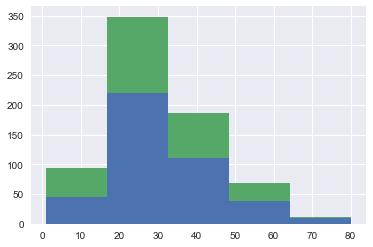

In [50]:
df1 = train[train["Survived"] == 0]['Age']
df2 = train[train["Survived"] == 1]['Age']
max_age = max(train["Age"])
plt.hist([df1, df2], 
         bins=5, 
         range=(1, max_age), 
         stacked=True)


The training set has 891 observations and 12 variables, count for Age is 714, which means there are 891- 714 = 177 age variable missing. So we shall fill in the "NaN" with the median value.

In [6]:
print train["Age"].median()
train["Age"] = train["Age"].fillna(train["Age"].median())

28.0


In [7]:
# Passengers that survived vs passengers that passed away
print (train["Survived"].value_counts()), "\n"
# As proportions
print (train["Survived"].value_counts(normalize= True))

0    549
1    342
Name: Survived, dtype: int64 

0    0.616162
1    0.383838
Name: Survived, dtype: float64


In [8]:
print ("Males that survived vs males that passed away")
print(train['Survived'][train['Sex']=='male'].value_counts())

# Normalized male survival
print(train['Survived'][train['Sex']=='male'].value_counts(normalize = True))

Males that survived vs males that passed away
0    468
1    109
Name: Survived, dtype: int64
0    0.811092
1    0.188908
Name: Survived, dtype: float64


In [9]:
print ("Females that survived vs Females that passed away")
print(train['Survived'][train['Sex']=='female'].value_counts())

# Normalized female survival
print(train['Survived'][train['Sex']=='female'].value_counts(normalize = True))

Females that survived vs Females that passed away
1    233
0     81
Name: Survived, dtype: int64
1    0.742038
0    0.257962
Name: Survived, dtype: float64


In [10]:
# Create the column Child and assign to 'NaN'
train["Child"] = 0
train["Child"][train["Age"]<18] = 1
train["Child"][train["Age"]>= 18] = 0
# Assign 1 to passengers under 18, 0 to those 18 or older. Print the new column.
#print (train['Child'])

print "normalized Survival Rates for passengers under 18"
print(train["Survived"][train["Child"] == 1].value_counts(normalize = True)), "\n"

print "normalized Survival Rates for passengers 18 or older"

print(train["Survived"][train["Child"] == 0].value_counts(normalize = True))


normalized Survival Rates for passengers under 18
1    0.539823
0    0.460177
Name: Survived, dtype: float64 

normalized Survival Rates for passengers 18 or older
0    0.638817
1    0.361183
Name: Survived, dtype: float64


/Users/xuemingli/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/xuemingli/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [11]:
print train["Embarked"].value_counts()
# Impute the Embarked variable
train["Embarked"] = train['Embarked'].fillna('S')

# Convert the Embarked classes to integer form

train["Embarked"][train["Embarked"] == "S"] = 0
train["Embarked"][train["Embarked"] == "C"] = 1
train["Embarked"][train["Embarked"] == "Q"] = 2
print train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64
0    646
1    168
2     77
Name: Embarked, dtype: int64


/Users/xuemingli/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/xuemingli/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/xuemingli/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [12]:
# Convert the male and female groups to integer
train["Sex"][train["Sex"] == "male"] = 0
train['Sex'][train['Sex'] == 'female'] = 1
#print (train['Sex'])

/Users/xuemingli/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/xuemingli/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


**target** = train["Survived"].values

**features** = train[["Sex", "Age"]].values

**my_tree** = tree.DecisionTreeClassifier()

**my_tree** = my_tree.fit(features, target)

In [13]:
# Print the train data to see the available features
print(train.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris   0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...   1  38.0      1      0   
2                             Heikkinen, Miss. Laina   1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)   1  35.0      1      0   
4                           Allen, Mr. William Henry   0  35.0      0      0   

             Ticket     Fare Cabin Embarked  Child  
0         A/5 21171   7.2500   NaN        0      0  
1          PC 17599  71.2833   C85        1      0  
2  STON/O2. 3101282   7.9250   NaN        0      0  
3            113803  53.1000  C123        0      0  
4            373450   8.0500   NaN   

## Creating decision tree

In [14]:
# Create the target and features numpy arrays: target, features_one
target = train['Survived'].values
features_one = train[["Pclass", "Sex", "Age", "Fare"]].values

# Fit your first decision tree: my_tree_one
my_tree_one = tree.DecisionTreeClassifier()
my_tree_one = my_tree_one.fit(features_one, target)

# Look at the importance and score of the included features
print("Importances: ")
print ("Pclass", my_tree_one.feature_importances_[0], "Sex", my_tree_one.feature_importances_[1], "Age", my_tree_one.feature_importances_[2], "Fare", my_tree_one.feature_importances_[3])
print(my_tree_one.score(features_one, target))

Importances: 
('Pclass', 0.1223156059792298, 'Sex', 0.31274009040120898, 'Age', 0.23921810975953053, 'Fare', 0.32572619386003066)
0.977553310887


In [15]:
# Impute the missing value with the median
test = pd.read_csv("test.csv")
print test.head()
test["Age"] = test["Age"].fillna(test["Age"].median())
test["Sex"][test["Sex"] == "male"] = 0
test["Sex"][test["Sex"] == "female"] = 1
test["Fare"] = test["Fare"].fillna(test["Fare"].median())
print test.describe()

   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  
       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  418.000000  418.000000  418.000000  418.000000
mean   1100.500000 

/Users/xuemingli/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/xuemingli/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [16]:
# Extract the features from the test set: Pclass, Sex, Age, and Fare.
test_features = test[['Pclass', 'Sex', 'Age', 'Fare']].values

# Make your prediction using the test set
my_prediction = my_tree_one.predict(test_features)

# Create a data frame with two columns: PassengerId & Survived. Survived contains your predictions
PassengerId =np.array(test["PassengerId"]).astype(int)
my_solution = pd.DataFrame(my_prediction, PassengerId, columns = ["Survived"])
print(my_solution)

# Check that your data frame has 418 entries
print(my_solution.shape)

# Write your solution to a csv file with the name my_solution.csv
my_solution.to_csv("my_solution_one.csv", index_label = ["PassengerId"])
print(my_solution)

      Survived
892          0
893          0
894          1
895          1
896          1
897          0
898          0
899          0
900          1
901          0
902          0
903          0
904          1
905          1
906          1
907          1
908          0
909          1
910          1
911          0
912          0
913          1
914          1
915          0
916          1
917          0
918          1
919          1
920          1
921          0
...        ...
1280         0
1281         0
1282         0
1283         1
1284         1
1285         0
1286         0
1287         1
1288         0
1289         1
1290         0
1291         0
1292         1
1293         0
1294         1
1295         1
1296         0
1297         0
1298         0
1299         0
1300         1
1301         1
1302         1
1303         1
1304         0
1305         0
1306         1
1307         0
1308         0
1309         0

[418 rows x 1 columns]
(418, 1)
      Survived
892          0
893    

**Your submission scored 0.72249**

### Control the Overfitting

In DecisionTreeRegressor, the depth of our model is defined by two parameters: - the max_depth parameter determines when the splitting up of the decision tree stops. - the min_samples_split parameter monitors the amount of observations in a bucket. If a certain threshold is not reached (e.g minimum 10 passengers) no further splitting can be done.

In [17]:
# Create a new array with the added features: features_two
features_two = train[["Pclass","Age","Sex","Fare", 'SibSp', 'Parch', 'Embarked']].values
#print (features_two)

#Control overfitting by setting "max_depth" to 10 and "min_samples_split" to 5 : my_tree_two
max_depth = 10
min_samples_split = 5

my_tree_two = tree.DecisionTreeClassifier(max_depth = max_depth, min_samples_split = min_samples_split, random_state = 1)
my_tree_two = my_tree_two.fit(features_two, target)

#Print the score of the new decison tree
print my_tree_two.feature_importances_
print (my_tree_two.score(features_two,target))

[ 0.14130255  0.17906027  0.41616727  0.17938711  0.05039699  0.01923751
  0.0144483 ]
0.905723905724


In [18]:
test["Embarked"] = test['Embarked'].fillna('S')

# Convert the Embarked classes to integer form

test["Embarked"][test["Embarked"] == "S"] = 0
test["Embarked"][test["Embarked"] == "C"] = 1
test["Embarked"][test["Embarked"] == "Q"] = 2


/Users/xuemingli/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/xuemingli/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/xuemingli/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [19]:
# Extract the features from the test set: Pclass, Sex, Age, and Fare.
test_features = test[["Pclass","Age","Sex","Fare", 'SibSp', 'Parch', 'Embarked']].values

print test_features
# Make your prediction using the test set
my_prediction = my_tree_two.predict(test_features)
# Create a data frame with two columns: PassengerId & Survived. Survived contains your predictions
PassengerId =np.array(test["PassengerId"]).astype(int)
my_solution = pd.DataFrame(my_prediction, PassengerId, columns = ["Survived"])
print(my_solution)

# Check that your data frame has 418 entries
print(my_solution.shape)

# Write your solution to a csv file with the name my_solution.csv
my_solution.to_csv("my_solution_two.csv", index_label = ["PassengerId"])
print(my_solution)


[[3 34.5 0 ..., 0 0 2]
 [3 47.0 1 ..., 1 0 0]
 [2 62.0 0 ..., 0 0 2]
 ..., 
 [3 38.5 0 ..., 0 0 0]
 [3 27.0 0 ..., 0 0 0]
 [3 27.0 0 ..., 1 1 1]]
      Survived
892          0
893          0
894          0
895          0
896          1
897          0
898          0
899          0
900          1
901          0
902          0
903          0
904          1
905          0
906          1
907          1
908          0
909          0
910          1
911          0
912          1
913          1
914          1
915          1
916          1
917          0
918          1
919          0
920          0
921          0
...        ...
1280         0
1281         0
1282         1
1283         1
1284         1
1285         0
1286         0
1287         1
1288         0
1289         1
1290         0
1291         0
1292         1
1293         0
1294         1
1295         1
1296         0
1297         0
1298         0
1299         0
1300         1
1301         1
1302         1
1303         1
1304         0

**Your submission scored 0.76077**

## Feature-engineering##

A valid assumption is that larger families need more time to get together on a sinking ship, and hence have lower probability of surviving. Family size is determined by the variables SibSp and Parch, which indicate the number of family members a certain passenger is traveling with. So when doing feature engineering, you add a new variable family_size, which is the sum of SibSp and Parch plus one (the observation itself), to the test and train set.

In [20]:
# Create train_two with the newly defined feature
train_two = train.copy()
train_two["family_size"] = train['SibSp'] + train['Parch']+1

# Create a new feature set and add the new feature
features_three = train_two[["Pclass", "Sex", "Age", "Fare", "SibSp", "Parch", 'family_size']].values

# Define the tree classifier, then fit the model
my_tree_three = tree.DecisionTreeClassifier()
my_tree_three = my_tree_three.fit(features_three, target)

# Print the score of this decision tree
print(my_tree_three.score(features_three, target))

0.979797979798


In [21]:
# Extract the features from the test set: Pclass, Sex, Age, and Fare.
test_two = test.copy()
test_two["family_size"] = test['SibSp'] + test['Parch']+1
test_features = test_two[["Pclass", "Sex", "Age", "Fare", "SibSp", "Parch", 'family_size']].values
# Make your prediction using the test set
my_prediction = my_tree_three.predict(test_features)
# Create a data frame with two columns: PassengerId & Survived. Survived contains your predictions
PassengerId =np.array(test_two["PassengerId"]).astype(int)
my_solution = pd.DataFrame(my_prediction, PassengerId, columns = ["Survived"])
print(my_solution)

# Check that your data frame has 418 entries
print(my_solution.shape)

# Write your solution to a csv file with the name my_solution.csv
my_solution.to_csv("my_solution_three.csv", index_label = ["PassengerId"])
print(my_solution)

      Survived
892          0
893          0
894          1
895          1
896          1
897          0
898          0
899          0
900          1
901          0
902          0
903          0
904          1
905          1
906          1
907          1
908          0
909          1
910          1
911          0
912          0
913          1
914          1
915          1
916          0
917          0
918          1
919          1
920          1
921          1
...        ...
1280         0
1281         0
1282         0
1283         1
1284         1
1285         0
1286         1
1287         1
1288         0
1289         1
1290         0
1291         0
1292         1
1293         0
1294         1
1295         1
1296         0
1297         0
1298         0
1299         0
1300         1
1301         1
1302         1
1303         1
1304         1
1305         0
1306         1
1307         0
1308         0
1309         1

[418 rows x 1 columns]
(418, 1)
      Survived
892          0
893    

**Your submission scored 0.62679**

## Random Forest 
 
Random Forest technique handles the overfitting problem you faced with decision trees. It grows multiple (very deep) classification trees using the training set. At the time of prediction, each tree is used to come up with a prediction and every outcome is counted as a vote. For example, if you have trained 3 trees with 2 saying a passenger in the test set will survive and 1 says he will not, the passenger will be classified as a survivor. 

In [22]:
# Import the `RandomForestClassifier`
from sklearn.ensemble import RandomForestClassifier

In [23]:
# We want the Pclass, Age, Sex, Fare,SibSp, Parch, and Embarked variables
features_forest = train[["Pclass", "Age", "Sex", "Fare", "SibSp", "Parch", "Embarked"]].values

# Building and fitting my_forest
forest = RandomForestClassifier(max_depth = 10, min_samples_split=2, n_estimators = 100, random_state = 1)
my_forest = forest.fit(features_forest, target)

# Print the score of the fitted random forest
print(my_forest.score(features_forest, target))

# Compute predictions on our test set features then print the length of the prediction vector
test_features = test[["Pclass", "Age", "Sex", "Fare", "SibSp", "Parch", "Embarked"]].values
pred_forest = my_forest.predict(test_features)
PassengerId =np.array(test_two["PassengerId"]).astype(int)
my_solution = pd.DataFrame(pred_forest, PassengerId, columns = ["Survived"])
print "Check that your data frame has 418 entries"
print(my_solution.shape)
# Write your solution to a csv file with the name my_solution.csv
my_solution.to_csv("my_solution_four.csv", index_label = ["PassengerId"])
print my_solution

0.939393939394
Check that your data frame has 418 entries
(418, 1)
      Survived
892          0
893          0
894          0
895          0
896          0
897          0
898          0
899          0
900          1
901          0
902          0
903          0
904          1
905          0
906          1
907          1
908          0
909          0
910          0
911          0
912          1
913          0
914          1
915          1
916          1
917          0
918          1
919          0
920          0
921          0
...        ...
1280         0
1281         0
1282         0
1283         1
1284         0
1285         0
1286         0
1287         1
1288         0
1289         1
1290         0
1291         0
1292         1
1293         0
1294         1
1295         0
1296         0
1297         0
1298         0
1299         0
1300         1
1301         1
1302         1
1303         1
1304         0
1305         0
1306         1
1307         0
1308         0
1309         1

[4

In [24]:
#Request and print the `.feature_importances_` attribute
print(my_tree_two.feature_importances_)
print(my_forest.feature_importances_)

#Compute and print the mean accuracy score for both models
print(my_tree_two.score(features_two, target))
print(my_forest.score(features_forest, target))

[ 0.14130255  0.17906027  0.41616727  0.17938711  0.05039699  0.01923751
  0.0144483 ]
[ 0.10384741  0.20139027  0.31989322  0.24602858  0.05272693  0.04159232
  0.03452128]
0.905723905724
0.939393939394


The most important feature was "Sex", but it was more significant for "my_tree_two"

**Your submission scored 0.75598**

In [25]:
from sklearn.svm import SVC
# We want the Pclass, Age, Sex, Fare,SibSp, Parch, and Embarked variables
features_svc = train[["Pclass", "Age", "Sex", "Fare", "SibSp", "Parch", "Embarked"]].values

# Building and fitting my_forest
clf = SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
my_pred = clf.fit(features_svc, target)

# Print the score of the fitted random forest
print(my_pred.score(features_svc, target))

# Compute predictions on our test set features then print the length of the prediction vector
tests_svc = test[["Pclass", "Age", "Sex", "Fare", "SibSp", "Parch", "Embarked"]].values
pred_svc = clf.predict(tests_svc)
PassengerId =np.array(test_two["PassengerId"]).astype(int)
my_solution = pd.DataFrame(pred_svc, PassengerId, columns = ["Survived"])
print "Check that your data frame has 418 entries"
print(my_solution.shape)
# Write your solution to a csv file with the name my_solution.csv
my_solution.to_csv("my_solution_svc.csv", index_label = ["PassengerId"])
print my_solution

#Compute and print the mean accuracy score for both models
print(clf.score(features_two, target))


0.892255892256
Check that your data frame has 418 entries
(418, 1)
      Survived
892          0
893          0
894          1
895          0
896          0
897          0
898          0
899          1
900          0
901          1
902          0
903          0
904          1
905          0
906          0
907          1
908          0
909          0
910          0
911          0
912          1
913          1
914          1
915          1
916          1
917          0
918          1
919          0
920          1
921          0
...        ...
1280         0
1281         0
1282         1
1283         1
1284         1
1285         0
1286         0
1287         1
1288         0
1289         1
1290         0
1291         0
1292         1
1293         1
1294         1
1295         1
1296         0
1297         0
1298         0
1299         1
1300         1
1301         1
1302         1
1303         1
1304         0
1305         0
1306         1
1307         0
1308         0
1309         0

[4

Your submission scored 0.62679